<a href="https://colab.research.google.com/github/annisarizkaaulia/pelatihan/blob/model/Klasifikasi_Cuaca_Kota_Lhokseumawe_Backpropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Membaca file Excel
df = pd.read_excel('data_cuaca.xlsx')

# Mengambil kolom dan baris yang diinginkan
kolom_yang_diambil = ['NoStasiun', 'NamaStasiun', 'Tahun', 'Jam', 'Arah_angin', 'Kecepatan_angin', 'JarakPandang', 'Suhu', 'TitikEmbun', 'TekananQFF', 'Cuaca']  # Ganti dengan nama kolom yang diinginkan
# baris_yang_diambil = df.loc[1:10]  # Ganti dengan baris yang diinginkan

# Membuat DataFrame baru dengan kolom dan baris yang diambil
# df_baru = df[kolom_yang_diambil].loc[baris_yang_diambil]
df_baru = df[kolom_yang_diambil]

# Menyimpan DataFrame baru ke file Excel
df_baru.to_excel('datacuaca_new.xlsx', index=False)



In [ ]:
df = pd.read_excel('datacuaca_new.xlsx') #membaca file excel
df

,NoStasiun,NamaStasiun,Tahun,Jam,Arah_angin,Kecepatan_angin,JarakPandang,Suhu,TitikEmbun,TekananQFF,Cuaca
0,96009,Stasiun Meteorologi Malikussaleh,2018.0,0.0,140.0,5.0,5.0,23.9,22.8,1009.2,5.0
1,96009,Stasiun Meteorologi Malikussaleh,2018.0,1.0,120.0,6.0,6.0,24.4,23.1,1010.2,60.0
2,96009,Stasiun Meteorologi Malikussaleh,2018.0,2.0,120.0,7.0,6.0,25.5,23.8,1010.6,21.0
3,96009,Stasiun Meteorologi Malikussaleh,2018.0,3.0,120.0,8.0,7.0,27.4,24.3,1010.5,1.0
4,96009,Stasiun Meteorologi Malikussaleh,2018.0,4.0,110.0,9.0,7.0,28.9,25.3,1009.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...
38821,96009,Lhokseumawe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38822,96009,Lhokseumawe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38823,96009,Lhokseumawe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38824,96009,Lhokseumawe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info() #melihat info data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38826 entries, 0 to 38825
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NoStasiun        38826 non-null  int64  
 1   NamaStasiun      38826 non-null  object 
 2   Tahun            38753 non-null  float64
 3   Jam              38754 non-null  float64
 4   Arah_angin       38585 non-null  float64
 5   Kecepatan_angin  38585 non-null  float64
 6   JarakPandang     38586 non-null  float64
 7   Suhu             38586 non-null  float64
 8   TitikEmbun       38585 non-null  float64
 9   TekananQFF       38586 non-null  float64
 10  Cuaca            9790 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 3.3+ MB


In [ ]:
df.isna().sum() #melihat data yang null

NoStasiun              0
NamaStasiun            0
Tahun                 73
Jam                   72
Arah_angin           241
Kecepatan_angin      241
JarakPandang         240
Suhu                 240
TitikEmbun           241
TekananQFF           240
Cuaca              29036
dtype: int64

In [ ]:
df.isna().any() #melihat data yang null

NoStasiun          False
NamaStasiun        False
Tahun               True
Jam                 True
Arah_angin          True
Kecepatan_angin     True
JarakPandang        True
Suhu                True
TitikEmbun          True
TekananQFF          True
Cuaca               True
dtype: bool

In [ ]:
df=df.interpolate()
df

,NoStasiun,NamaStasiun,Tahun,Jam,Arah_angin,Kecepatan_angin,JarakPandang,Suhu,TitikEmbun,TekananQFF,Cuaca
0,96009,Stasiun Meteorologi Malikussaleh,2018.0,0.0,140.0,5.0,5.0,23.9,22.800000,1009.2,5.000000
1,96009,Stasiun Meteorologi Malikussaleh,2018.0,1.0,120.0,6.0,6.0,24.4,23.100000,1010.2,60.000000
2,96009,Stasiun Meteorologi Malikussaleh,2018.0,2.0,120.0,7.0,6.0,25.5,23.800000,1010.6,21.000000
3,96009,Stasiun Meteorologi Malikussaleh,2018.0,3.0,120.0,8.0,7.0,27.4,24.300000,1010.5,1.000000
4,96009,Stasiun Meteorologi Malikussaleh,2018.0,4.0,110.0,9.0,7.0,28.9,25.300000,1009.8,1.333333
...,...,...,...,...,...,...,...,...,...,...,...
38821,96009,Lhokseumawe,2022.0,23.0,0.0,0.0,6.0,23.5,22.664358,1012.5,2.000000
38822,96009,Lhokseumawe,2022.0,23.0,0.0,0.0,6.0,23.5,22.664358,1012.5,2.000000
38823,96009,Lhokseumawe,2022.0,23.0,0.0,0.0,6.0,23.5,22.664358,1012.5,2.000000
38824,96009,Lhokseumawe,2022.0,23.0,0.0,0.0,6.0,23.5,22.664358,1012.5,2.000000


In [ ]:
# df=df.dropna() #menghapuskan data yang null
df=df[~df['Tahun'].isin([2022, 2020, 2019, 2018])]
df

,NoStasiun,NamaStasiun,Tahun,Jam,Arah_angin,Kecepatan_angin,JarakPandang,Suhu,TitikEmbun,TekananQFF,Cuaca
10704,96009,Stasiun Meteorologi Malikussaleh,2009.0,0.0,220.0,5.00,6.0,23.100,19.800000,1010.200,4.782609
10705,96009,Stasiun Meteorologi Malikussaleh,2009.0,1.0,230.0,5.00,6.0,24.500,20.000000,1011.600,4.978261
10706,96009,Stasiun Meteorologi Malikussaleh,2009.0,2.0,220.0,4.00,7.0,27.900,21.300000,1012.000,5.173913
10707,96009,Stasiun Meteorologi Malikussaleh,2009.0,3.0,240.0,5.00,7.0,30.000,21.700000,1012.200,5.369565
10708,96009,Stasiun Meteorologi Malikussaleh,2009.0,4.0,270.0,4.00,7.0,30.900,22.200000,1012.200,5.565217
...,...,...,...,...,...,...,...,...,...,...,...
38006,96009,Lhokseumawe,200.0,19.0,260.0,2.80,6.0,23.920,23.819637,1010.240,42.200000
38007,96009,Lhokseumawe,200.0,20.0,258.0,2.84,6.0,23.916,23.815636,1010.252,39.560000
38008,96009,Lhokseumawe,200.0,21.0,256.0,2.88,6.0,23.912,23.811636,1010.264,36.920000
38009,96009,Lhokseumawe,200.0,22.0,254.0,2.92,6.0,23.908,23.807635,1010.276,34.280000


In [ ]:
df.isna().any()

NoStasiun          False
NamaStasiun        False
Tahun              False
Jam                False
Arah_angin         False
Kecepatan_angin    False
JarakPandang       False
Suhu               False
TitikEmbun         False
TekananQFF         False
Cuaca              False
dtype: bool

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3864 entries, 10704 to 38010
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NoStasiun        3864 non-null   int64  
 1   NamaStasiun      3864 non-null   object 
 2   Tahun            3864 non-null   float64
 3   Jam              3864 non-null   float64
 4   Arah_angin       3864 non-null   float64
 5   Kecepatan_angin  3864 non-null   float64
 6   JarakPandang     3864 non-null   float64
 7   Suhu             3864 non-null   float64
 8   TitikEmbun       3864 non-null   float64
 9   TekananQFF       3864 non-null   float64
 10  Cuaca            3864 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 362.2+ KB


In [ ]:
df.to_excel('datacuaca_clean.xlsx', index=False) #export data yang sudah dibersikan
df

,NoStasiun,NamaStasiun,Tahun,Jam,Arah_angin,Kecepatan_angin,JarakPandang,Suhu,TitikEmbun,TekananQFF,Cuaca
10704,96009,Stasiun Meteorologi Malikussaleh,2009.0,0.0,220.0,5.00,6.0,23.100,19.800000,1010.200,4.782609
10705,96009,Stasiun Meteorologi Malikussaleh,2009.0,1.0,230.0,5.00,6.0,24.500,20.000000,1011.600,4.978261
10706,96009,Stasiun Meteorologi Malikussaleh,2009.0,2.0,220.0,4.00,7.0,27.900,21.300000,1012.000,5.173913
10707,96009,Stasiun Meteorologi Malikussaleh,2009.0,3.0,240.0,5.00,7.0,30.000,21.700000,1012.200,5.369565
10708,96009,Stasiun Meteorologi Malikussaleh,2009.0,4.0,270.0,4.00,7.0,30.900,22.200000,1012.200,5.565217
...,...,...,...,...,...,...,...,...,...,...,...
38006,96009,Lhokseumawe,200.0,19.0,260.0,2.80,6.0,23.920,23.819637,1010.240,42.200000
38007,96009,Lhokseumawe,200.0,20.0,258.0,2.84,6.0,23.916,23.815636,1010.252,39.560000
38008,96009,Lhokseumawe,200.0,21.0,256.0,2.88,6.0,23.912,23.811636,1010.264,36.920000
38009,96009,Lhokseumawe,200.0,22.0,254.0,2.92,6.0,23.908,23.807635,1010.276,34.280000


In [ ]:
# import numpy as np
# import pandas as pd
# # # Contoh data dengan kolom jam dan kolom lain
# # data = np.array([
# #     [0, 10],
# #     [1, 15],
# #     [2, 20],
# #     # Tambahkan data lainnya di sini
# # ])
# df = pd.read_excel('datacuaca_clean.xlsx') #membaca file excel

# # Mengambil kolom jam dan kolom lain
# # Tahun = df['Tahun'].values
# Jam = df['Jam'].values
# Arah_angin = df['Arah_angin'].values
# Kecepatan_angin = df['Kecepatan_angin'].values
# JarakPandang = df['JarakPandang'].values
# Suhu = df['Suhu'].values
# TitikEmbun = df['TitikEmbun'].values
# TekananQFF = df['TekananQFF'].values
# Cuaca = df['Cuaca'].values

# # Perulangan berdasarkan kolom jam
# for i in range(len(Jam)):
#     # Tahun = Tahun[i]
#     Jam = Jam[i]
#     Arah_angin = Arah_angin[i]
#     Kecepatan_angin = Kecepatan_angin[i]
#     JarakPandang = JarakPandang[i]
#     Suhu = Suhu[i]
#     TitikEmbun = TitikEmbun[i]
#     TekananQFF = TekananQFF[i]
#     Cuaca = Cuaca[i]
#     # print("Saat ini jam:", nilai_jam)
#     # print("Nilai kolom:", nilai_kolom)

#     # Tambahkan logika atau tugas lain yang ingin dilakukan di setiap jam

# # Menghitung rata-rata kolom lain menggunakan NumPy
# Tahun = np.mean(Tahun)
# Jam = np.mean(Jam)
# Arah_angin = np.mean(Arah_angin)
# Kecepatan_angin = np.mean(Kecepatan_angin)
# JarakPandang = np.mean(JarakPandang)
# Suhu = np.mean(Suhu)
# TitikEmbun = np.mean(TitikEmbun)
# TekananQFF = np.mean(TekananQFF)
# Cuaca = np.mean(Cuaca)
# print("Rata-rata Tahun:", Tahun)
# print("Rata-rata Jam:", Jam)
# print("Rata-rata Arah_angin:", Arah_angin)
# print("Rata-rata Kecepatan_angin:", Kecepatan_angin)
# print("Rata-rata JarakPandang:", JarakPandang)
# print("Rata-rata Suhu:", Suhu)
# print("Rata-rata TitikEmbun:", TitikEmbun)
# print("Rata-rata TekananQFF:", TekananQFF)
# print("Rata-rata Cuaca:", Cuaca)

# Membuat dataframe kosong untuk menyimpan hasil rata-rata
# mean_df = pd.DataFrame(columns=['Tahun', 'Jam', 'Arah_angin', 'Kecepatan_angin', 'JarakPandang', 'Suhu', 'TitikEmbun', 'TekananQFF', 'Cuaca'])

# # Menghitung rata-rata berdasarkan jam dan menyimpan hasil dalam dataframe mean_df
# for jam in range(21235):
#     Jam = df[df['Jam'] == jam]
#     Arah_angin = Jam['Arah_angin'].mean()
#     Kecepatan_angin = Jam['Kecepatan_angin'].mean()
#     JarakPandang = Jam['JarakPandang'].mean()
#     Suhu = Jam['Suhu'].mean()
#     TitikEmbun = Jam['TitikEmbun'].mean()
#     TekananQFF = Jam['TekananQFF'].mean()
#     Cuaca = Jam['Cuaca'].mean()
#     mean_df = mean_df.append({'Jam': jam, 'Arah_angin': Arah_angin, 'Kecepatan_angin': Kecepatan_angin, 'JarakPandang': JarakPandang, 'Suhu': Suhu, 'TitikEmbun': TitikEmbun, 'TekananQFF': TekananQFF, 'Cuaca': Cuaca, }, ignore_index=True)

# # Menyimpan hasil rata-rata ke dalam file Excel
# with pd.ExcelWriter('datacuacaprediksi.xlsx', engine='openpyxl') as writer:
#     mean_df.to_excel(writer, index=False, sheet_name='datacuacaprediksi')


In [ ]:
# # Contoh data yang akan diurutkan secara berulang
# df = pd.read_excel('datacuaca_clean.xlsx')
# df = df['Jam'] 
# # Perulangan untuk mengurutkan data secara berulang
# for i in range(len(df)):
#     for j in range(len(df)-1):
#         if df[j] > df[j+1]:
#             df[j], df[j+1] = df[j+1], df[j]

# df


In [ ]:
df=df.drop(columns=['NoStasiun', 'NamaStasiun', 'Tahun', 'Jam']) #menghapus kolom nostasiun, namastasiun, tahun
df

,Arah_angin,Kecepatan_angin,JarakPandang,Suhu,TitikEmbun,TekananQFF,Cuaca
10704,220.0,5.00,6.0,23.100,19.800000,1010.200,4.782609
10705,230.0,5.00,6.0,24.500,20.000000,1011.600,4.978261
10706,220.0,4.00,7.0,27.900,21.300000,1012.000,5.173913
10707,240.0,5.00,7.0,30.000,21.700000,1012.200,5.369565
10708,270.0,4.00,7.0,30.900,22.200000,1012.200,5.565217
...,...,...,...,...,...,...,...
38006,260.0,2.80,6.0,23.920,23.819637,1010.240,42.200000
38007,258.0,2.84,6.0,23.916,23.815636,1010.252,39.560000
38008,256.0,2.88,6.0,23.912,23.811636,1010.264,36.920000
38009,254.0,2.92,6.0,23.908,23.807635,1010.276,34.280000


In [ ]:
df.to_excel('datacuacaprediksi.xlsx', index=False) #export data yang sudah didrop
df

,Arah_angin,Kecepatan_angin,JarakPandang,Suhu,TitikEmbun,TekananQFF,Cuaca
10704,220.0,5.00,6.0,23.100,19.800000,1010.200,4.782609
10705,230.0,5.00,6.0,24.500,20.000000,1011.600,4.978261
10706,220.0,4.00,7.0,27.900,21.300000,1012.000,5.173913
10707,240.0,5.00,7.0,30.000,21.700000,1012.200,5.369565
10708,270.0,4.00,7.0,30.900,22.200000,1012.200,5.565217
...,...,...,...,...,...,...,...
38006,260.0,2.80,6.0,23.920,23.819637,1010.240,42.200000
38007,258.0,2.84,6.0,23.916,23.815636,1010.252,39.560000
38008,256.0,2.88,6.0,23.912,23.811636,1010.264,36.920000
38009,254.0,2.92,6.0,23.908,23.807635,1010.276,34.280000


**Mengubah data kategori cuaca BMKG menjadi kategori yang diinginkan (cerah,berawan, hujan)**
---


In [ ]:
df = pd.read_excel('datacuacaprediksi.xlsx')

# Menerapkan kondisi if, elif, else pada kolom 'KolomA'
def apply_condition(row):
    if row['Cuaca'] <= 3:
        return 'Cerah'
    elif row['Cuaca'] <= 19:
        return 'Berawan'
    else:
        return 'Hujan'

df['Cuaca'] = df.apply(apply_condition, axis=1)

# Menyimpan hasil perubahan ke file Excel baru
df.to_excel('dataset_weather.xlsx', index=False)

In [ ]:
df = pd.read_excel('dataset_weather.xlsx')
df

,Arah_angin,Kecepatan_angin,JarakPandang,Suhu,TitikEmbun,TekananQFF,Cuaca
0,220.0,5.00,6.0,23.100,19.800000,1010.200,Berawan
1,230.0,5.00,6.0,24.500,20.000000,1011.600,Berawan
2,220.0,4.00,7.0,27.900,21.300000,1012.000,Berawan
3,240.0,5.00,7.0,30.000,21.700000,1012.200,Berawan
4,270.0,4.00,7.0,30.900,22.200000,1012.200,Berawan
...,...,...,...,...,...,...,...
3859,260.0,2.80,6.0,23.920,23.819637,1010.240,Hujan
3860,258.0,2.84,6.0,23.916,23.815636,1010.252,Hujan
3861,256.0,2.88,6.0,23.912,23.811636,1010.264,Hujan
3862,254.0,2.92,6.0,23.908,23.807635,1010.276,Hujan


In [ ]:
df.shape

(3864, 7)

In [ ]:
df.nunique()

Arah_angin         198
Kecepatan_angin    127
JarakPandang       121
Suhu               259
TitikEmbun         240
TekananQFF         266
Cuaca                3
dtype: int64

In [ ]:
df.columns

Index(['Arah_angin', 'Kecepatan_angin', 'JarakPandang', 'Suhu', 'TitikEmbun',
       'TekananQFF', 'Cuaca'],
      dtype='object')

In [ ]:
df.isna().sum()

Arah_angin         0
Kecepatan_angin    0
JarakPandang       0
Suhu               0
TitikEmbun         0
TekananQFF         0
Cuaca              0
dtype: int64

In [ ]:
df.describe()

,Arah_angin,Kecepatan_angin,JarakPandang,Suhu,TitikEmbun,TekananQFF
count,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000
mean,153.448240,4.153986,32.323370,26.868794,23.617118,1009.600673
std,96.856327,2.692855,1608.604212,2.628356,1.056556,1.865196
min,0.000000,0.000000,0.500000,21.000000,18.700000,1003.600000
25%,70.000000,2.000000,6.000000,24.600000,23.000000,1008.400000
50%,150.000000,3.000000,6.000000,26.400000,23.600000,1009.700000
75%,230.000000,6.000000,7.000000,29.200000,24.300000,1010.900000
max,360.000000,40.000000,99999.000000,34.600000,26.700000,1014.800000


In [ ]:
df.groupby(['Cuaca']).size()

Cuaca
Berawan    2629
Cerah       249
Hujan       986
dtype: int64

In [ ]:
# berawan = 4342/9790
# berawan

In [ ]:
# cerah = 1197/9790
# cerah

In [ ]:
# hujan = 4251/9790
# hujan

In [ ]:
numerical=['Arah_angin','Kecepatan_angin',	'JarakPandang',	'Suhu',	'TitikEmbun',	'TekananQFF']
target=['Cuaca']

In [ ]:
# df_num=df[numerical]
# Q1=df_num.quantile(0.25)
# Q3=df_num.quantile(0.75)
# IQR=Q3-Q1

In [ ]:
# low_limit=Q1-(IQR*1.5)
# high_limit=Q3+(IQR*1.5)

In [ ]:
# ((df_num < low_limit) | (df_num > high_limit)).any()

In [ ]:
# x=((df_num < low_limit) | (df_num > high_limit))
# x['res']=x.any(axis=1)
# x[x['res']==True].shape

In [ ]:
# df=df[df.index.isin(x[x.res==False].index.to_list())]
# df

# **Feature Encoding**

In [ ]:
ports={"Cerah":0,"Berawan":1,"Hujan":2}
df['Cuaca']=df['Cuaca'].map(ports)
df
# from sklearn.preprocessing import LabelEncoder
# le=LabelEncoder()
# Y = le.fit_transform(df['Cuaca'])

,Arah_angin,Kecepatan_angin,JarakPandang,Suhu,TitikEmbun,TekananQFF,Cuaca
0,220.0,5.00,6.0,23.100,19.800000,1010.200,1
1,230.0,5.00,6.0,24.500,20.000000,1011.600,1
2,220.0,4.00,7.0,27.900,21.300000,1012.000,1
3,240.0,5.00,7.0,30.000,21.700000,1012.200,1
4,270.0,4.00,7.0,30.900,22.200000,1012.200,1
...,...,...,...,...,...,...,...
3859,260.0,2.80,6.0,23.920,23.819637,1010.240,2
3860,258.0,2.84,6.0,23.916,23.815636,1010.252,2
3861,256.0,2.88,6.0,23.912,23.811636,1010.264,2
3862,254.0,2.92,6.0,23.908,23.807635,1010.276,2



## **EDA**

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt


In [ ]:
df.columns

Index(['Arah_angin', 'Kecepatan_angin', 'JarakPandang', 'Suhu', 'TitikEmbun',
       'TekananQFF', 'Cuaca'],
      dtype='object')

<Axes: ylabel='count'>

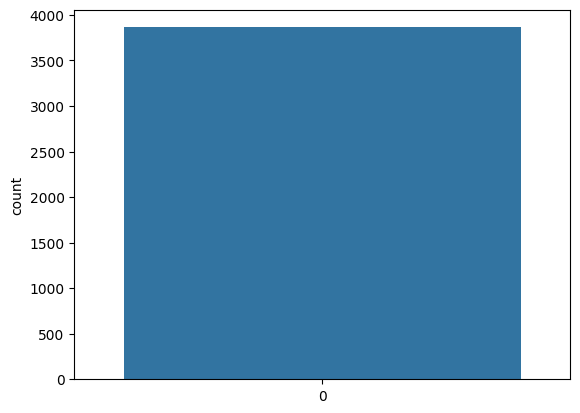

In [ ]:
sns.countplot(df['Cuaca'],label='count')

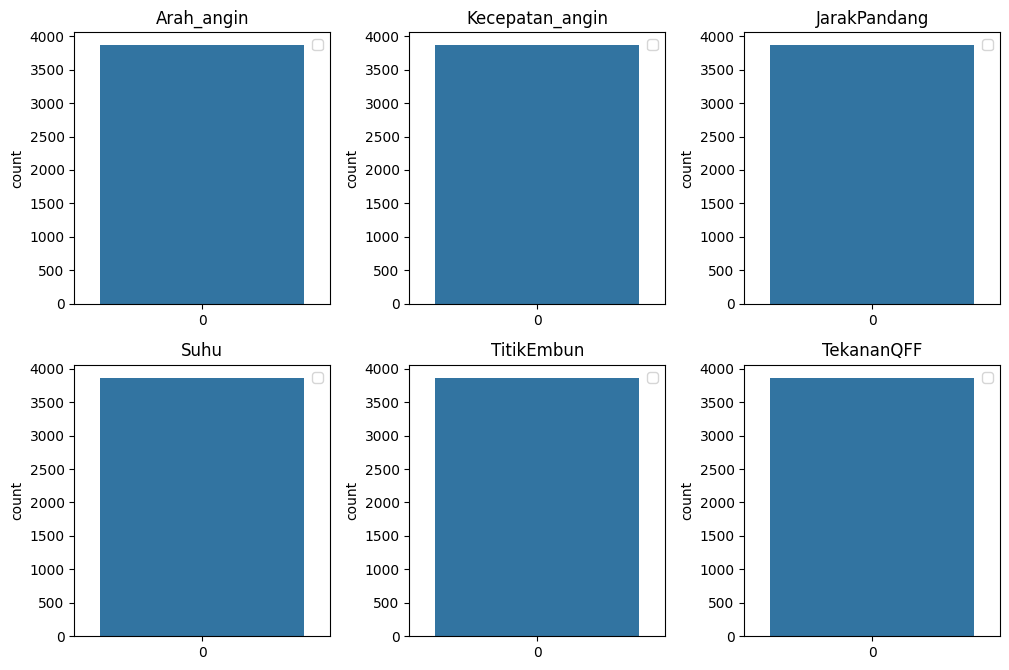

In [ ]:
col=df.columns

n_rows=2
n_cols=3

fig,axis=plt.subplots(n_rows,n_cols,figsize=(n_cols*3.4,n_rows*3.4))

for r in range(0,n_rows):
    for c in range(0,n_cols):
        i=r*n_cols+c
        ax=axis[r][c]
        sns.countplot(df[col[i]],ax=ax)
        ax.set_title(col[i])
        ax.legend(loc='upper right')

plt.tight_layout()

#**Feature Selection**

<Axes: >

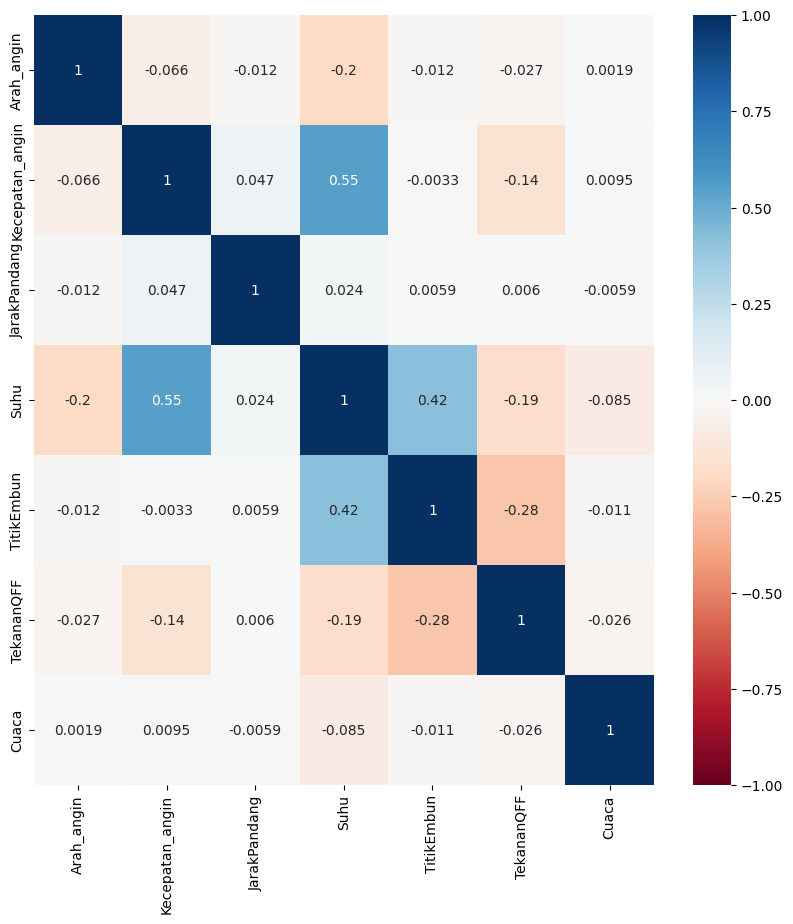

In [ ]:
fig.ax=plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),cmap='RdBu',vmin=-1,vmax=1,annot=True)

In [ ]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2,mutual_info_classif

In [ ]:
X=df.drop(['Cuaca'],axis=1)
Y=df['Cuaca']


In [ ]:
col=X.columns

In [ ]:
importance=mutual_info_classif(X,Y,random_state=98)
feat_importance=pd.Series(importance,col)
feat_importance

Arah_angin         0.066576
Kecepatan_angin    0.047695
JarakPandang       0.045322
Suhu               0.049383
TitikEmbun         0.039203
TekananQFF         0.037098
dtype: float64

# **Feature Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
df.describe()

,Arah_angin,Kecepatan_angin,JarakPandang,Suhu,TitikEmbun,TekananQFF,Cuaca
count,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000
mean,153.448240,4.153986,32.323370,26.868794,23.617118,1009.600673,1.190735
std,96.856327,2.692855,1608.604212,2.628356,1.056556,1.865196,0.532269
min,0.000000,0.000000,0.500000,21.000000,18.700000,1003.600000,0.000000
25%,70.000000,2.000000,6.000000,24.600000,23.000000,1008.400000,1.000000
50%,150.000000,3.000000,6.000000,26.400000,23.600000,1009.700000,1.000000
75%,230.000000,6.000000,7.000000,29.200000,24.300000,1010.900000,2.000000
max,360.000000,40.000000,99999.000000,34.600000,26.700000,1014.800000,2.000000


In [ ]:
numerical

['Arah_angin',
 'Kecepatan_angin',
 'JarakPandang',
 'Suhu',
 'TitikEmbun',
 'TekananQFF']

In [ ]:
scaler=StandardScaler()
df[numerical]=scaler.fit_transform(df[numerical].values)
df

,Arah_angin,Kecepatan_angin,JarakPandang,Suhu,TitikEmbun,TekananQFF,Cuaca
0,0.687207,0.314211,-0.016366,-1.434083,-3.613258,0.321363,1
1,0.790466,0.314211,-0.016366,-0.901362,-3.423940,1.072051,1
2,0.687207,-0.057190,-0.015744,0.392390,-2.193368,1.286533,1
3,0.893725,0.314211,-0.015744,1.191471,-1.814731,1.393775,1
4,1.203503,-0.057190,-0.015744,1.533935,-1.341434,1.393775,1
...,...,...,...,...,...,...,...
3859,1.100244,-0.502872,-0.016366,-1.122061,0.191704,0.342811,2
3860,1.079592,-0.488016,-0.016366,-1.123583,0.187917,0.349245,2
3861,1.058940,-0.473160,-0.016366,-1.125105,0.184130,0.355680,2
3862,1.038288,-0.458304,-0.016366,-1.126627,0.180343,0.362114,2


(array([ 249.,    0.,    0.,    0.,    0., 2629.,    0.,    0.,    0.,
         986.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

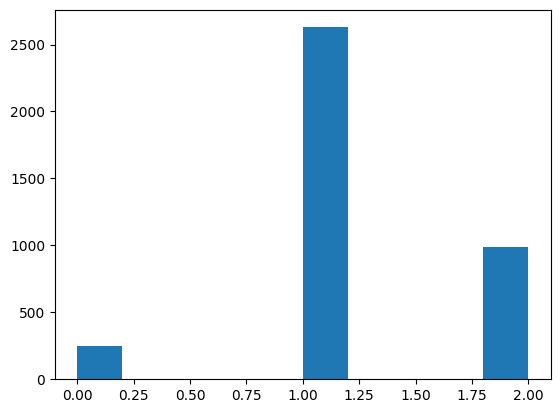

In [ ]:
plt.hist(df.Cuaca)

# **split data**

In [ ]:
X=df.drop(['Cuaca'],axis=1)
Y=df['Cuaca']
X.columns

Index(['Arah_angin', 'Kecepatan_angin', 'JarakPandang', 'Suhu', 'TitikEmbun',
       'TekananQFF'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 100)

In [ ]:
X_train.shape

(3091, 6)

In [ ]:
X_test.shape

(773, 6)

In [ ]:
Y_train.shape

(3091,)

In [ ]:
Y_test.shape

(773,)

In [ ]:
# class myCallback(tf.keras.callbacks.Callback):
#   # Define the correct function signature for on_epoch_end
#   def on_epoch_end(self, epoch, logs={}):
#     if logs.get('accuracy') is not None and logs.get('accuracy') > 0.80:                 
#       print("\nReached 80% accuracy so cancelling training!")
#       # Stop training once the above condition is met
#       self.model.stop_training = True

In [ ]:
import tensorflow as tf
# callbacks = myCallback()

# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    # tf.keras.layers.Dense(128, activation='relu'),
    # tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Now you can call the fit() method
model.fit(X_train, Y_train, epochs=1000, batch_size=128)
# model.evaluate(X_train, X_train, batch_size=128)
# model.evaluate(X_test, Y_test, batch_size=128)

Epoch 1/1000
25/25 [==============================] - 1s 3ms/step - loss: 0.8097 - accuracy: 0.6784
Epoch 2/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.7592 - accuracy: 0.6810
Epoch 3/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.7524 - accuracy: 0.6901
Epoch 4/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.7416 - accuracy: 0.7001
Epoch 5/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.7371 - accuracy: 0.7092
Epoch 6/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.7338 - accuracy: 0.7140
Epoch 7/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.7275 - accuracy: 0.7166
Epoch 8/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.7234 - accuracy: 0.7195
Epoch 9/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.7204 - accuracy: 0.7189
Epoch 10/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.7178 - accuracy: 0.7231

In [ ]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 6)                 42        
                                                                 
 dense_57 (Dense)            (None, 64)                448       
                                                                 
 dense_58 (Dense)            (None, 3)                 195       
                                                                 
Total params: 685
Trainable params: 685
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_test, Y_test, epochs=1000, batch_size=128)

Epoch 1/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.8429 - accuracy: 0.7193
Epoch 2/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.8212 - accuracy: 0.6986
Epoch 3/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.7630 - accuracy: 0.7025
Epoch 4/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.7337 - accuracy: 0.7348
Epoch 5/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.7185 - accuracy: 0.7193
Epoch 6/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.7208 - accuracy: 0.7167
Epoch 7/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.7183 - accuracy: 0.7374
Epoch 8/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.6804 - accuracy: 0.7232
Epoch 9/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.6951 - accuracy: 0.7257
Epoch 10/1000
7/7 [==============================] - 0s 5ms/step - loss: 0.7119 - accuracy: 0.7128
Epoch 11/1000
7/7 [

In [ ]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 6)                 42        
                                                                 
 dense_57 (Dense)            (None, 64)                448       
                                                                 
 dense_58 (Dense)            (None, 3)                 195       
                                                                 
Total params: 685
Trainable params: 685
Non-trainable params: 0
_________________________________________________________________
